<a href="https://colab.research.google.com/github/Ashwini-data-wizard/Text-Mining_University_Data/blob/main/LDA_Scatterpots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import pandas as pd

data = pd.read_csv("/content/textmining cleaned.csv", encoding='latin-1')

# Preparing for LDA Topic Modeling
# Using CountVectorizer for LDA (as it works with raw term counts)
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(ai_statements)

# Fitting LDA Model
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(cv_matrix)

# Function to print top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

# Printing the top 10 words for each topic
print_top_words(lda, cv.get_feature_names_out(), 10)


Topic #0: ai use chatgpt students tools information academic writing work data
Topic #1: ai data tools used information chatgpt research assist fairness text
Topic #2: graduate academic student dean instructor studies shall tribunal report consequences
Topic #3: students ai chatgpt approach time learning work student know generated
Topic #4: genai students use tools course instructors learning faculty assignments student
Topic #5: ai generative use tools students policies content data course university
Topic #6: ai tools use students work writing course chatgpt student instructor
Topic #7: ai generative tools use students learning data academic course integrity
Topic #8: ai students use tools learning information chatgpt generative course data
Topic #9: ai use tools students course generative chatgpt gai content generated



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


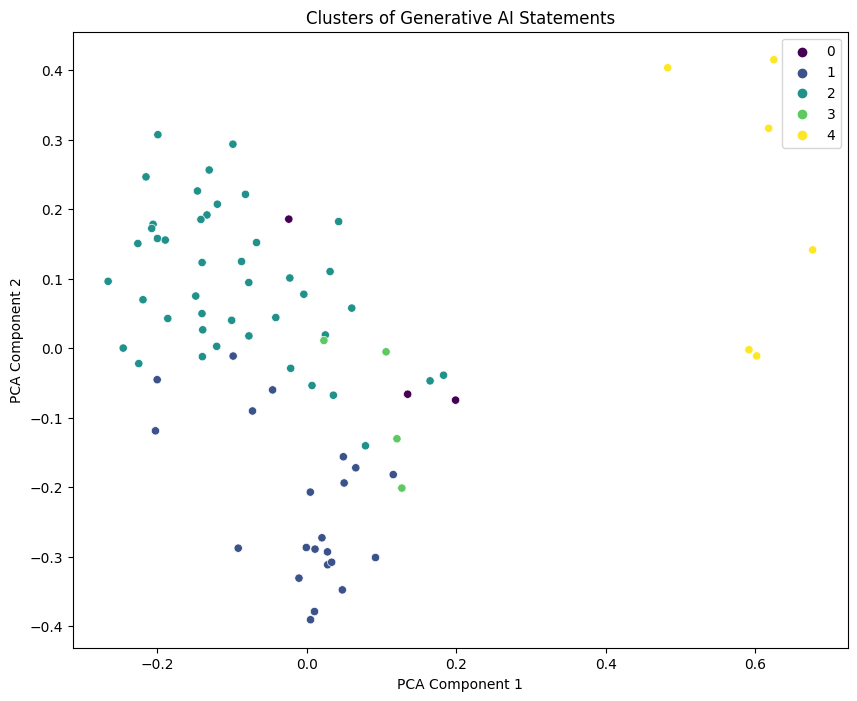

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting the relevant column for analysis
ai_statements = data['Generative AI statement text'].dropna()

# Vectorizing the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(ai_statements)

# Performing KMeans clustering
# Assuming an arbitrary number of clusters for initial exploration, let's say 5
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Getting the cluster labels
labels = kmeans.labels_

# Performing PCA to reduce the dimensions to 2D for visualization
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X.toarray())

# Extracting the coordinates for visualization
x_axis = [point[0] for point in scatter_plot_points]
y_axis = [point[1] for point in scatter_plot_points]

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=labels, palette="viridis")
plt.title('Clusters of Generative AI Statements')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [ ]:
pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.9 MB/s eta 0:00:00


In [ ]:

import numpy as np
import pandas as pd

data = pd.read_csv("/content/textmining cleaned.csv", encoding='latin-1')

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer



# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)
    compound_score = sentiment_score['compound']

    # Classify sentiment based on compound score
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'Generative AI statement text' column
data['Sentiment'] = data['Generative AI statement text'].apply(get_sentiment)

# Display the DataFrame with sentiment analysis results
print(data[['Generative AI statement text', 'Sentiment']])



                         Generative AI statement text Sentiment
0   Our existing academic integrity regulations go...  Positive
1   Generative AI is a type of artificial intellig...  Positive
2   The Board on Conduct Affairs (BCA) has been as...  Positive
3   Publicly available generative Artificial Intel...  Positive
4   Penn embraces innovations like generative arti...  Positive
..                                                ...       ...
73  Provost Mandel made clear that, ultimately, it...  Positive
74  Artificial Intelligence Tools and Teaching\nPr...  Positive
75  STATEMENT OF POLICY AND PROCEDURE\nA. BACKGROU...  Positive
76  Faculty Guide on Teaching and Generative AI\nI...  Positive
77  Guiding Principles \nLearning-Centered: Like a...  Positive

[78 rows x 2 columns]


In [ ]:
from IPython.display import display

# Save DataFrame to CSV
data[['Generative AI statement text', 'Sentiment']].to_csv('/content/sentiment_output.csv', index=False)

# Display more rows in Colab
display(data[['Generative AI statement text', 'Sentiment']])

,Generative AI statement text,Sentiment
0,Our existing academic integrity regulations go...,Positive
1,Generative AI is a type of artificial intellig...,Positive
2,The Board on Conduct Affairs (BCA) has been as...,Positive
3,Publicly available generative Artificial Intel...,Positive
4,Penn embraces innovations like generative arti...,Positive
...,...,...
73,"Provost Mandel made clear that, ultimately, it...",Positive
74,Artificial Intelligence Tools and Teaching\nPr...,Positive
75,STATEMENT OF POLICY AND PROCEDURE\nA. BACKGROU...,Positive
76,Faculty Guide on Teaching and Generative AI\nI...,Positive


In [ ]:
# Apply sentiment analysis to the 'Generative AI statement text' column
data['Sentiment'] = data['Generative AI statement text'].apply(get_sentiment)

# Check if 'University' column exists before printing and saving
columns_to_print = ['University', 'Sentiment']
if all(col in data.columns for col in columns_to_print):
    print(data[columns_to_print])
    data[columns_to_print].to_csv('sentiment_output.csv', index=False)
else:
    print("Columns 'University' or 'Sentiment' not found in the DataFrame.")

In [ ]:
# Convert the dictionary into a DataFrame
output_df = pd.DataFrame([(key, value[0]) for key, value in university_sentiments.items()], columns=['University name', 'Sentiment'])

# Display the DataFrame
print(output_df)

In [ ]:
from IPython.display import display

# Save DataFrame to CSV
data[['Generative AI statement text', 'Sentiment']].to_csv('/content/sentiment_output.csv', index=False)

# Display more rows in Colab
display(data[['Generative AI statement text', 'Sentiment']])


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming _df_0 is your DataFrame and 'Sentiment' is a column in it
sentiment_counts = _df_0['Sentiment'].value_counts()

# Plotting the vertical bar plot
ax = sentiment_counts.plot(kind='bar', color=sns.color_palette('Dark2', len(sentiment_counts)))

# Annotate the maximum counts
max_count = sentiment_counts.max()
for i, count in enumerate(sentiment_counts):
    ax.text(i, count, f' Max: {max_count}', ha='center', va='bottom', fontsize=10, color='black')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming _df_0 is your DataFrame and 'Sentiment' is a column in it
sentiment_counts = _df_0['Sentiment'].value_counts()

# Plotting the vertical bar plot
ax = sentiment_counts.plot(kind='bar', color=sns.color_palette('Dark2', len(sentiment_counts)))

# Adding labels to each bar with their respective counts
for i, count in enumerate(sentiment_counts):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10, color='black')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
